# PART- 3 ( Handling the Outliers )

## Importing the necessary Libraries

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats

import warnings
warnings.filterwarnings("ignore")  # to suppress all warnings

## Reading the csv file

In [237]:
df0=pd.read_csv('df_cleaned_no_missing_val.csv')
df0.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950,80900,69900,46990,16800
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5,4,5,5,5
warranty,2,2,1,1,1
mileage,120200.0,5000.0,18900.0,18995.0,197000.0


## Getting a working copy

In [238]:
df=df0.copy()

## Checking the columns

In [239]:
df.columns

Index(['Unnamed: 0', 'make_model', 'make', 'location', 'price', 'body_type',
       'type', 'doors', 'warranty', 'mileage', 'first_registration', 'gearbox',
       'fuel_type', 'colour', 'paint', 'seller', 'seats', 'power',
       'engine_size', 'co_emissions', 'drivetrain', 'fuel_consumption',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'upholstery', 'previous_owner',
       'taxi_or_rental_car', 'country', 'age', 'comfort_convenience_n',
       'safety_security_n', 'entertainment_media_n', 'extras_n'],
      dtype='object')

In [240]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [241]:
df.shape

(28630, 39)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             28630 non-null  object 
 1   make                   28630 non-null  object 
 2   location               28630 non-null  object 
 3   price                  28630 non-null  int64  
 4   body_type              28630 non-null  object 
 5   type                   28630 non-null  object 
 6   doors                  28630 non-null  int64  
 7   warranty               28630 non-null  int64  
 8   mileage                28630 non-null  float64
 9   first_registration     28628 non-null  object 
 10  gearbox                28630 non-null  object 
 11  fuel_type              28630 non-null  object 
 12  colour                 28630 non-null  object 
 13  paint                  28630 non-null  object 
 14  seller                 28630 non-null  object 
 15  se

## First registration

In [243]:
df["first_registration"] = pd.to_datetime(df["first_registration"])

In [244]:
df["first_registration"].dtype

dtype('<M8[ns]')

In [245]:
correlation = df['first_registration'].corr(df['age'])
print("Correlation coefficient between 'first_registration' and 'age':", correlation)


Correlation coefficient between 'first_registration' and 'age': -0.9494079834577595


### There is a strong correlation between age and first_registration, so we can drop first_registration column.

In [246]:
df.drop('first_registration', axis=1, inplace=True)

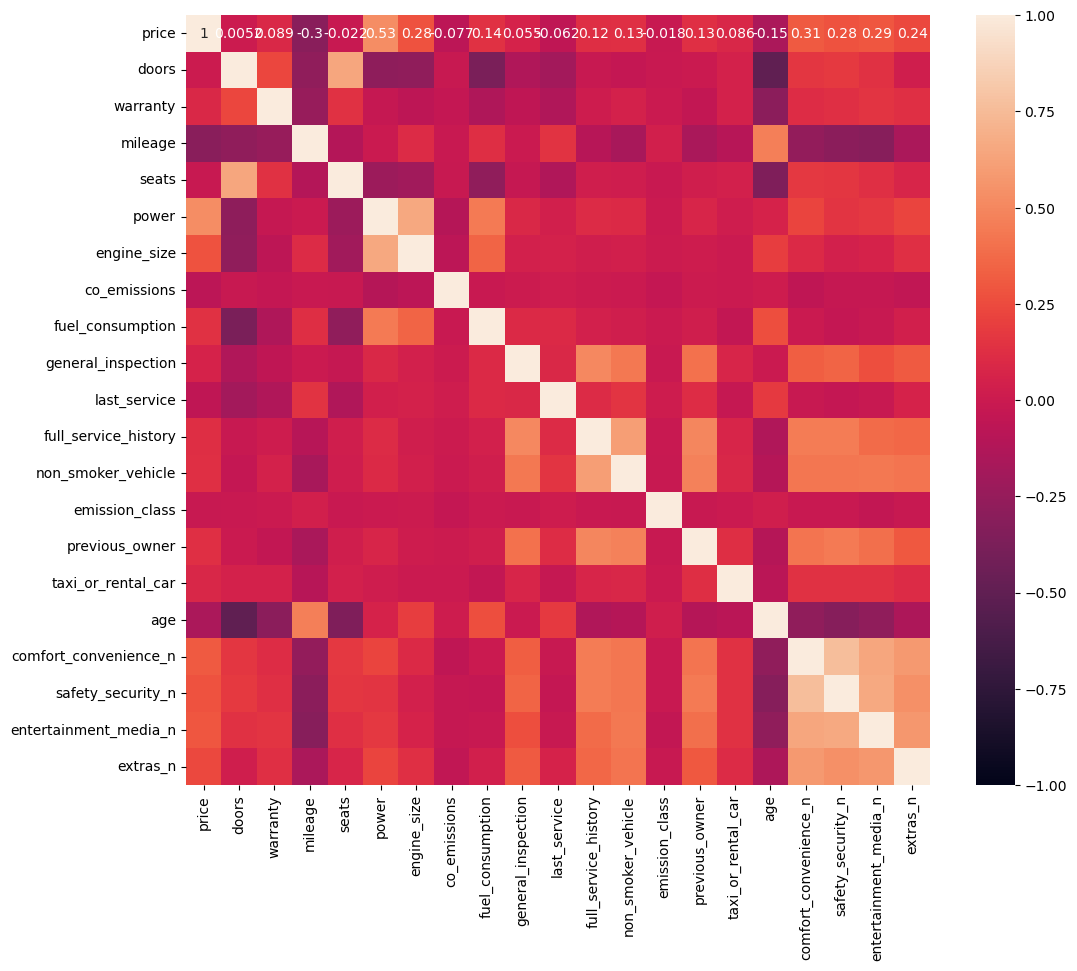

In [247]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin = -1, vmax = 1);

## Price

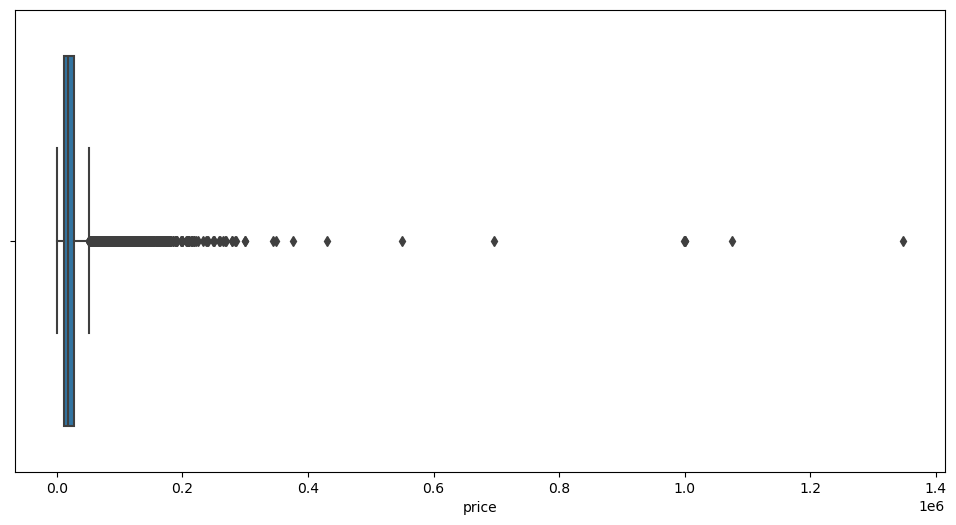

In [248]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = df['price']);

In [249]:
np.log(df.price)

0         9.738023
1        11.300969
2        11.154821
3        10.757690
4         9.729134
           ...    
28625    10.534759
28626     8.612322
28627     8.895630
28628    10.305614
28629     8.398410
Name: price, Length: 28630, dtype: float64

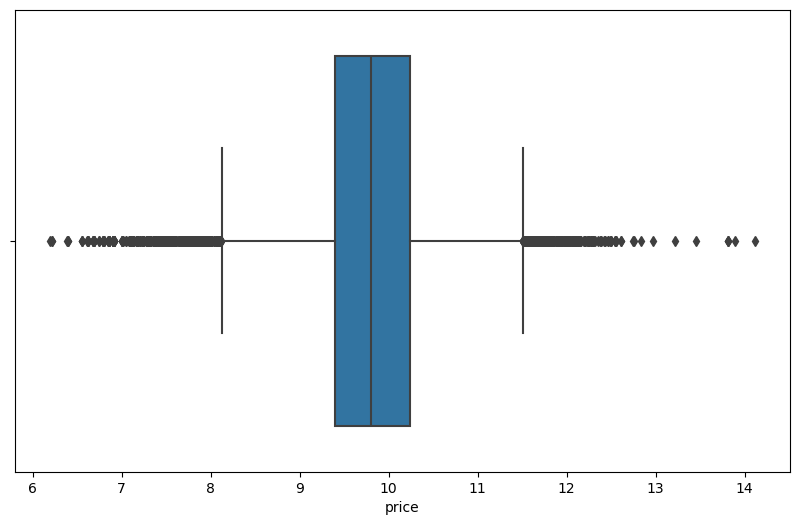

In [250]:
plt.figure(figsize=(10, 6))

sns.boxplot(x = np.log(df.price)); 

In [251]:
round(df['price'].describe(),2)

count      28630.00
mean       23555.20
std        25953.71
min          490.00
25%        11990.00
50%        17980.00
75%        27990.00
max      1346900.00
Name: price, dtype: float64

In [252]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

IQR = Q3 - Q1
IQR

16000.0

In [253]:
#lower_lim = Q1 - 2 * IQR
#upper_lim = Q3 + 2 * IQR  

#lower_lim, upper_lim

In [254]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR  

lower_lim, upper_lim

(-12010.0, 51990.0)

### Average car price in Europe is around 50K.
### I reviewed 2 IQR and 1.5 IQR values and decided that 1.5 IQR is matching with the average car price in Europe.

In [255]:
no_outliers = (df['price'] <= upper_lim) & (df['price'] >= lower_lim)

In [256]:
df = df[no_outliers]

In [257]:
df.shape

(26720, 38)

In [258]:
df['type'].value_counts(dropna=False)

type
Used              24013
Pre-registered     1248
Demonstration      1029
Employee's car      430
Name: count, dtype: int64

## Doors

In [259]:
df['doors'].value_counts(dropna=False)

doors
5    16818
2     5079
4     2635
3     2181
6        5
1        2
Name: count, dtype: int64

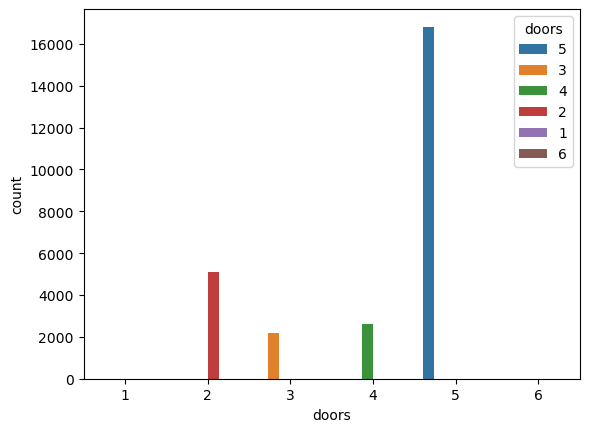

In [260]:
sns.countplot(data=df, x="doors", hue=df['doors'].astype(str));     # matplotlib requires labels (x axis) to be str


In [261]:
df.loc[df['doors']==1]

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
10001,Fiat 124 Spider,Fiat,"Via Chisini, 154, 31053 Pieve Di Soligo - Tre...",19000,Convertible,Used,1,0,48500.0,Manual,...,6,Leather,0,0,IT,55.0,2,2,2,1
21140,Ford Fiesta,Ford,"Ossiacher Zeile 29, 9500 Villach, AT",11790,Compact,Used,1,3,14600.0,Manual,...,6,Cloth,1,0,AT,5.0,1,2,1,1


In [262]:
df.loc[10001, 'doors'] = 2 # fiat 124 Spider 2 kapili oldugu icin 


In [263]:
df.loc[10001, 'doors']

2

In [264]:
df.loc[21140, 'doors'] = 5 #  Ford Fiesta Compact 5 kapili oldugu icin

In [265]:
df.loc[21140, 'doors']

5

In [266]:
df.loc[df['doors']==6]   

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
15931,Dacia Logan,Dacia,"Chaussée de Louvain 721, 5020 Champion, BE",2700,Station wagon,Used,6,0,210877.0,Manual,...,6,Cloth,1,0,BE,12.0,1,1,1,1
16097,Dacia Logan,Dacia,"SOMBREFFE 5140, 5140 SOMBREFFE, BE",1700,Station wagon,Used,6,0,144043.0,Manual,...,6,Cloth,0,0,BE,14.0,1,1,1,2
16105,Dacia Dokker,Dacia,"Ninoofsesteenweg 839, 1703 Dilbeek - Schepdaa...",16900,Station wagon,Used,6,2,90.0,Manual,...,6,Cloth,0,0,BE,0.0,1,1,2,1
16129,Dacia Logan,Dacia,"7390 Quaregnon, BE",3000,Station wagon,Used,6,0,258000.0,Manual,...,6,Cloth,1,0,BE,12.0,1,1,1,1
16163,Dacia Logan,Dacia,"Rue du Petit Chêne 21, 4000 Liege Coronmeuse, BE",5950,Station wagon,Used,6,0,173000.0,Manual,...,6,Cloth,1,0,BE,10.0,1,1,1,1


In [267]:
df.loc[[15931,16097,16105,16129,16163], 'doors']=5

In [268]:
df.loc[[15931,16097,16105,16129,16163]]

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
15931,Dacia Logan,Dacia,"Chaussée de Louvain 721, 5020 Champion, BE",2700,Station wagon,Used,5,0,210877.0,Manual,...,6,Cloth,1,0,BE,12.0,1,1,1,1
16097,Dacia Logan,Dacia,"SOMBREFFE 5140, 5140 SOMBREFFE, BE",1700,Station wagon,Used,5,0,144043.0,Manual,...,6,Cloth,0,0,BE,14.0,1,1,1,2
16105,Dacia Dokker,Dacia,"Ninoofsesteenweg 839, 1703 Dilbeek - Schepdaa...",16900,Station wagon,Used,5,2,90.0,Manual,...,6,Cloth,0,0,BE,0.0,1,1,2,1
16129,Dacia Logan,Dacia,"7390 Quaregnon, BE",3000,Station wagon,Used,5,0,258000.0,Manual,...,6,Cloth,1,0,BE,12.0,1,1,1,1
16163,Dacia Logan,Dacia,"Rue du Petit Chêne 21, 4000 Liege Coronmeuse, BE",5950,Station wagon,Used,5,0,173000.0,Manual,...,6,Cloth,1,0,BE,10.0,1,1,1,1


## Mileage

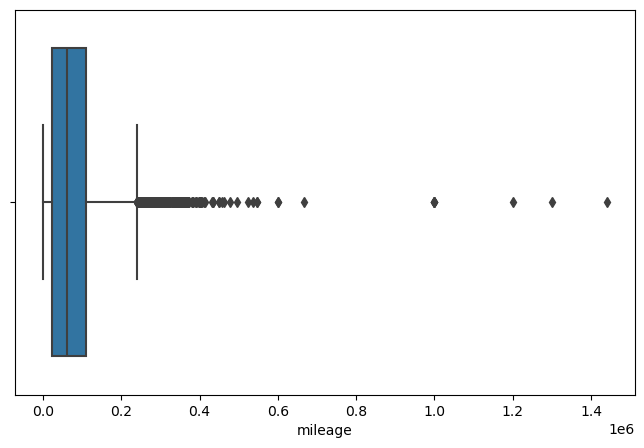

In [269]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['mileage']);

In [270]:
round(df['mileage'].describe(),2)

count      26720.00
mean       75904.09
std        67995.83
min            0.00
25%        23795.25
50%        61372.00
75%       110458.75
max      1440000.00
Name: mileage, dtype: float64

In [271]:
Q1 = df.mileage.quantile(0.25)
Q3 = df.mileage.quantile(0.75)

IQR = Q3 - Q1
IQR

86663.5

In [272]:
#lower_lim = Q1 - 1.5 * IQR
#upper_lim = Q3 + 1.5 * IQR  

#lower_lim, upper_lim

In [273]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR  

lower_lim, upper_lim

(-149531.75, 283785.75)

In [274]:
no_outliers= (df['mileage'] <= upper_lim) & (df['mileage'] >= lower_lim)

In [275]:
df = df[no_outliers]

In [276]:
df.shape

(26478, 38)

## Power

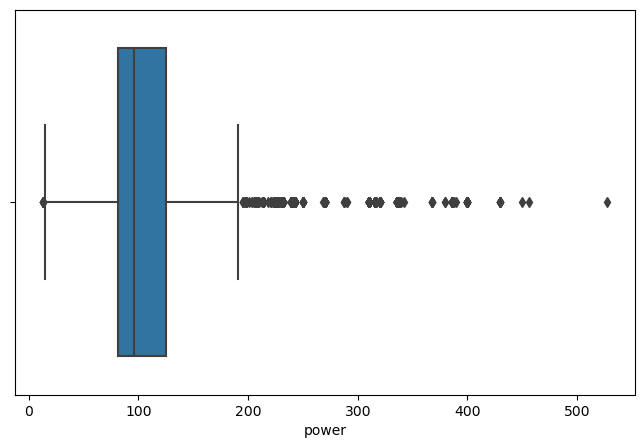

In [277]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['power']);

In [278]:
round(df['power'].describe(),2)

count    26478.00
mean       108.13
std         45.99
min         13.00
25%         81.00
50%         96.00
75%        125.00
max        527.00
Name: power, dtype: float64

In [279]:
Q1 = df.power.quantile(0.25)
Q3 = df.power.quantile(0.75)

IQR = Q3 - Q1
IQR

44.0

In [280]:
lower_lim = Q1 - IQR
upper_lim = Q3 + IQR  

lower_lim, upper_lim

(37.0, 169.0)

In [281]:
lower_lim3 = Q1 - 3 * IQR
upper_lim3= Q3 + 3 * IQR  

lower_lim3, upper_lim3

(-51.0, 257.0)

In [282]:
no_outliers= (df['power'] <= upper_lim3) & (df['power'] >= lower_lim)

In [283]:
df = df[no_outliers]

In [284]:
df.shape

(26003, 38)

## Engine Size

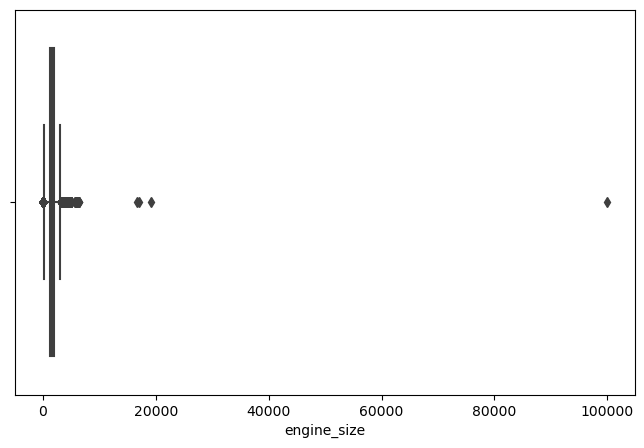

In [285]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['engine_size']);

In [286]:
round(df['engine_size'].describe(),2)

count    26003.00
mean      1619.63
std        845.74
min          0.00
25%       1242.00
50%       1580.00
75%       1969.00
max      99900.00
Name: engine_size, dtype: float64

In [287]:
df.loc[df['engine_size']>20000][['make_model','engine_size']]

,make_model,engine_size
16556,Dacia Sandero,99900


In [288]:
df.drop(16556, inplace=True)

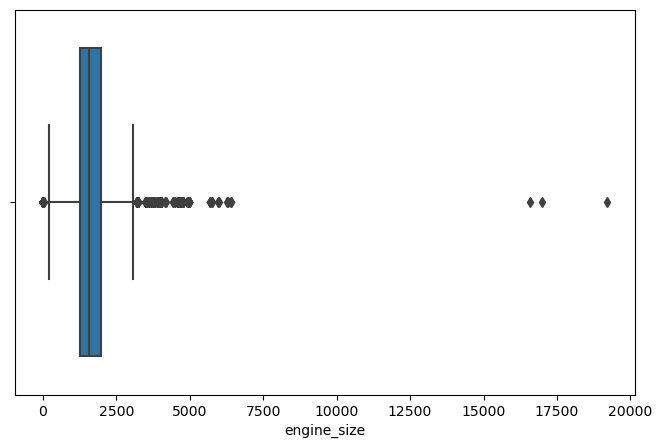

In [289]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['engine_size']);

In [290]:
Q1 = df.engine_size.quantile(0.25)
Q3 = df.engine_size.quantile(0.75)

IQR = Q3 - Q1
IQR

727.0

In [291]:
round(df['engine_size'].describe(),2)

count    26002.00
mean      1615.85
std        586.34
min          0.00
25%       1242.00
50%       1580.00
75%       1969.00
max      19194.00
Name: engine_size, dtype: float64

In [292]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 3*IQR  

lower_lim, upper_lim

(151.5, 4150.0)

In [293]:
no_outliers= (df['engine_size'] <= upper_lim) & (df['engine_size'] >= lower_lim)

In [294]:
df = df[no_outliers]

In [295]:
df.shape

(25580, 38)

## Age 

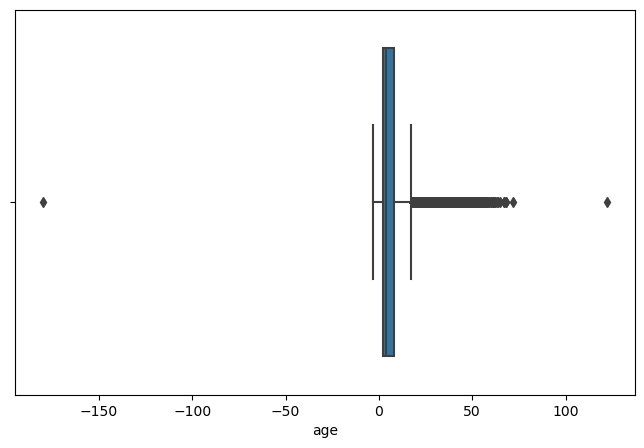

In [296]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['age']);

In [297]:
round(df['age'].describe(),2)

count    25580.00
mean         6.68
std          7.75
min       -180.00
25%          2.00
50%          4.00
75%          8.00
max        122.00
Name: age, dtype: float64

In [298]:
df.loc[df['age']<0]

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
7011,Renault Clio,Renault,"59223 Roncq, FR",16990,Sedan,Used,5,0,20926.0,Manual,...,5,Cloth,0,0,FR,-180.0,2,2,1,1
9764,Fiat 500 Abarth,Fiat,"Lange Dreef 29, 3902 AE VEENENDAAL, NL",17995,Compact,Used,3,0,59629.0,Manual,...,6,Cloth,0,0,NL,-3.0,1,2,1,1
19213,Nissan Micra,Nissan,"Geelhoornstraat 9a, 2172 BC SASSENHEIM, NL",3250,Convertible,Used,2,0,147985.0,Manual,...,6,Leather,0,0,NL,-1.0,1,1,1,1


In [299]:
df.drop([7011,9764, 19213], inplace=True)

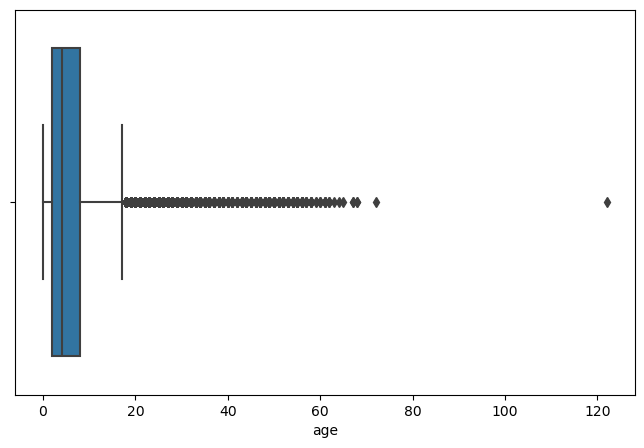

In [300]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['age']);

In [301]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)

IQR = Q3 - Q1
IQR

6.0

In [302]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 4*IQR  

lower_lim, upper_lim

(-7.0, 32.0)

In [303]:
df.loc[df['age']>32][['make_model','price', 'age']]

,make_model,price,age
88,Mercedes-Benz E 300,4500,36.0
538,Mercedes-Benz SL 300,32500,35.0
556,Mercedes-Benz SL 280,33890,43.0
578,Mercedes-Benz SL 380,28490,39.0
634,Mercedes-Benz SL 300,49890,34.0
...,...,...,...
26715,Volvo 480,5400,35.0
27802,Volvo P1800,25000,49.0
28182,Volvo P1800,25000,49.0
28496,Volvo 244,7450,43.0


In [304]:
no_outliers= (df['age'] <= upper_lim) & (df['age'] >= lower_lim)

In [305]:
df = df[no_outliers]

In [306]:
df.shape

(25209, 38)

## Co Emission

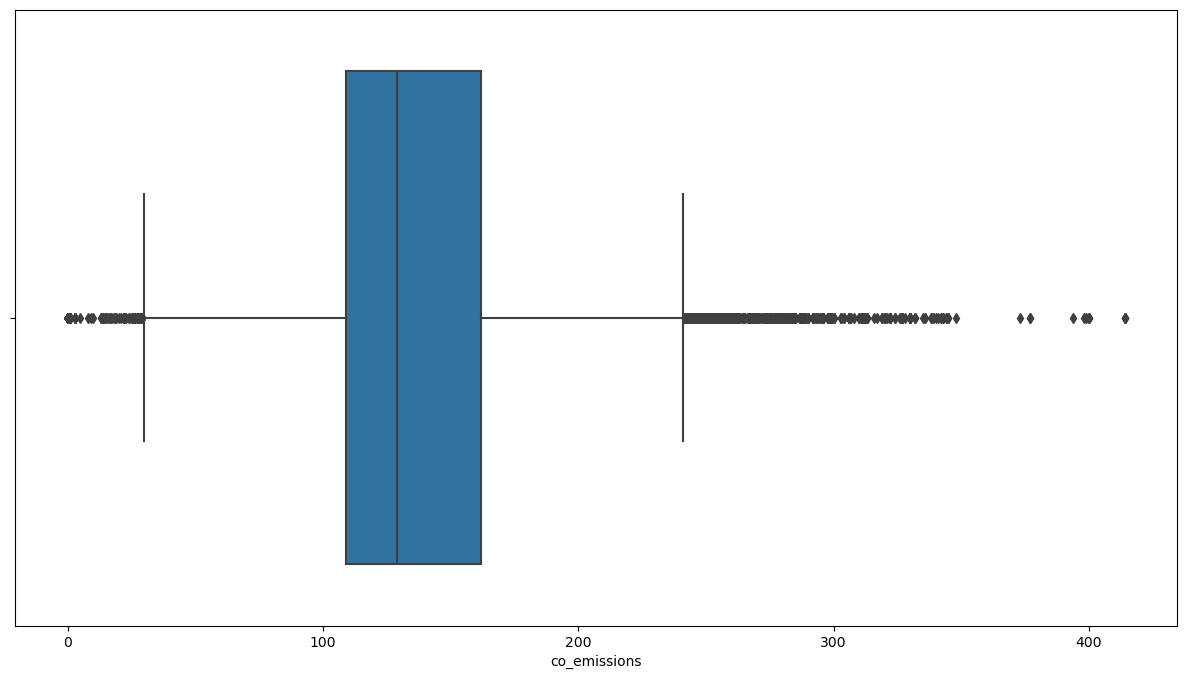

In [307]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = df['co_emissions']);

In [308]:
round(df.co_emissions.describe(),2)

count    25209.00
mean       136.11
std         57.90
min          0.00
25%        109.00
50%        129.00
75%        162.00
max        414.00
Name: co_emissions, dtype: float64

In [309]:
Q1 = df.co_emissions.quantile(0.25)
Q3 = df.co_emissions.quantile(0.75)
IQR = Q3 - Q1
IQR

53.0

In [310]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 2.5 * IQR
lower_lim, upper_lim

(29.5, 294.5)

In [311]:
no_outliers= (df['co_emissions'] <= upper_lim) & (df['co_emissions'] >= lower_lim)

In [312]:
df = df[no_outliers]

In [313]:
df.shape

(23719, 38)

## Fuel consumption

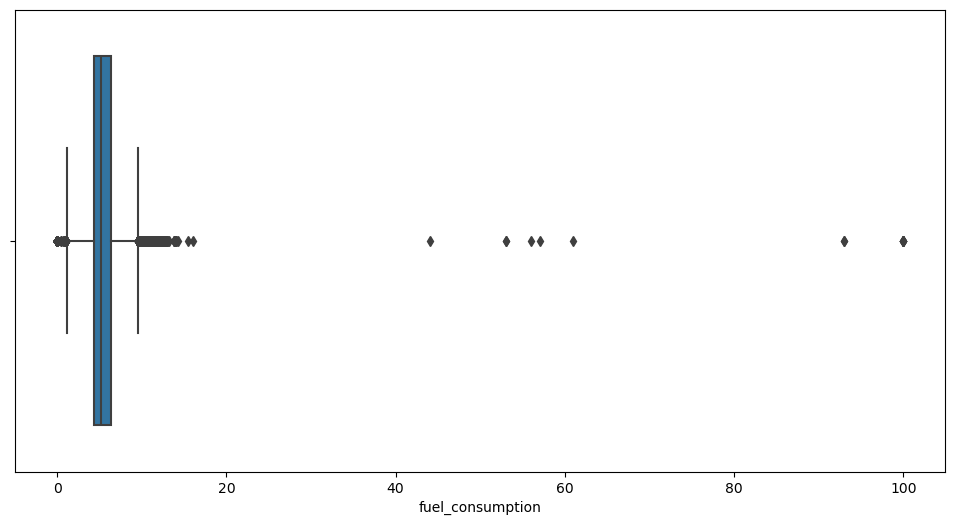

In [314]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = df['fuel_consumption']);

In [315]:
df.loc[df['fuel_consumption']>20][['make_model', 'fuel_consumption']]

,make_model,fuel_consumption
265,Mercedes-Benz A 180,99.9
1771,Mercedes-Benz E 200,61.0
6580,Renault Megane,57.0
18546,Toyota Yaris,56.0
18757,Nissan Qashqai,99.9
18760,Nissan Qashqai,99.9
18798,Nissan Qashqai,99.9
18799,Nissan Qashqai,99.9
19904,Nissan Qashqai,44.0
20995,Ford Focus,93.0


In [316]:
df.drop(df.loc[df['fuel_consumption']>20].index,inplace=True)

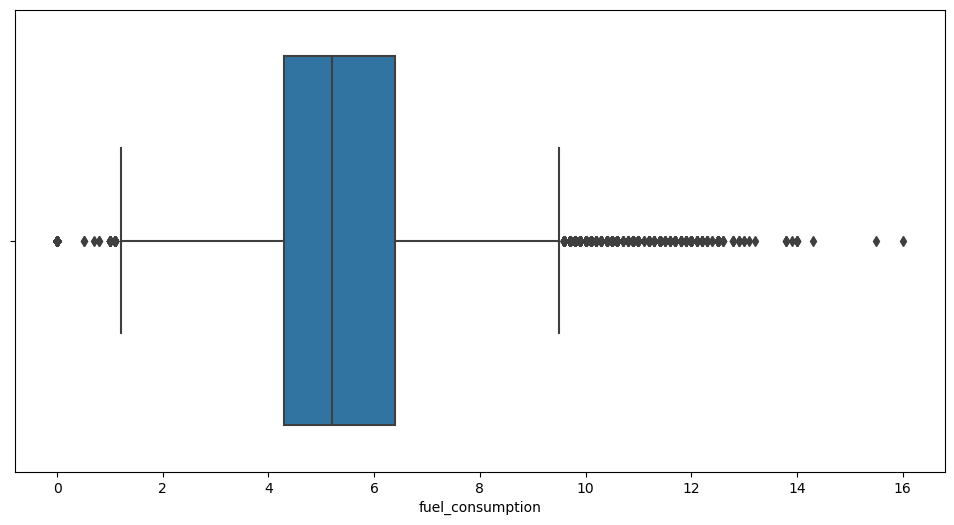

In [317]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = df['fuel_consumption']);

In [318]:
round(df['fuel_consumption'].describe(),2)

count    23704.00
mean         5.45
std          2.00
min          0.00
25%          4.30
50%          5.20
75%          6.40
max         16.00
Name: fuel_consumption, dtype: float64

In [319]:
Q1 = df.fuel_consumption.quantile(0.25)
Q3 = df.fuel_consumption.quantile(0.75)
IQR = Q3 - Q1
IQR

2.1000000000000005

In [320]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 2 * IQR
lower_lim, upper_lim

(1.149999999999999, 10.600000000000001)

In [321]:
no_outliers= (df['fuel_consumption'] <= upper_lim) & (df['fuel_consumption'] >= lower_lim)

In [322]:
df = df[no_outliers]

In [323]:
df.shape

(22588, 38)

In [324]:
df.head().T

,0,3,4,5,6
make_model,Mercedes-Benz A 160,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG,Mercedes-Benz C 160,Mercedes-Benz CLA 180
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES","Beethovenstr. 89, 42655 Solingen, DE","CR PATERNA-LA CAÑADA, KM. 2, 46980 PATERNA, ES"
price,16950,46990,16800,4690,22550
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Used,Used,Used,Used
doors,5,5,5,3,5
warranty,2,1,1,0,1
mileage,120200.0,18995.0,197000.0,165000.0,83339.0
gearbox,Manual,Automatic,Automatic,Manual,Manual


## Checking the final situation of the data via graphs

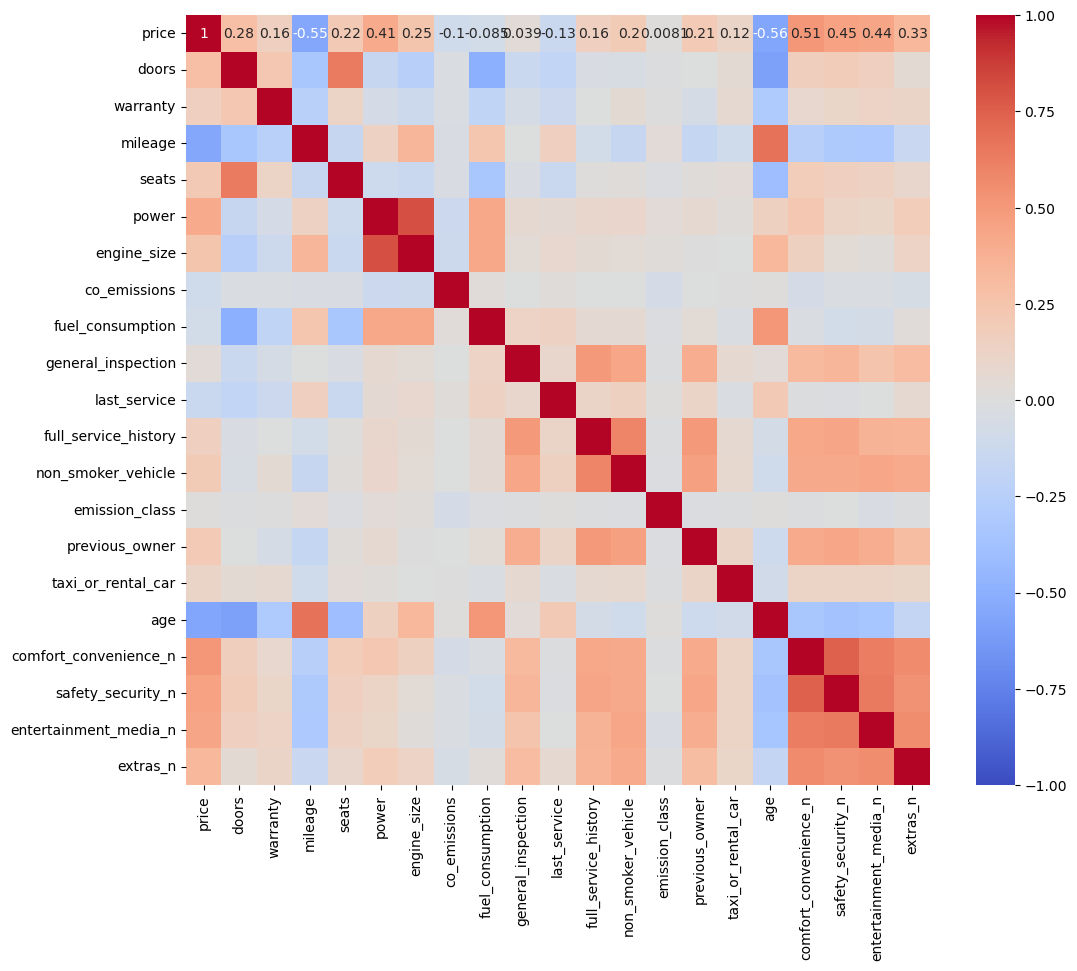

In [325]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin = -1, vmax = 1, cmap='coolwarm');

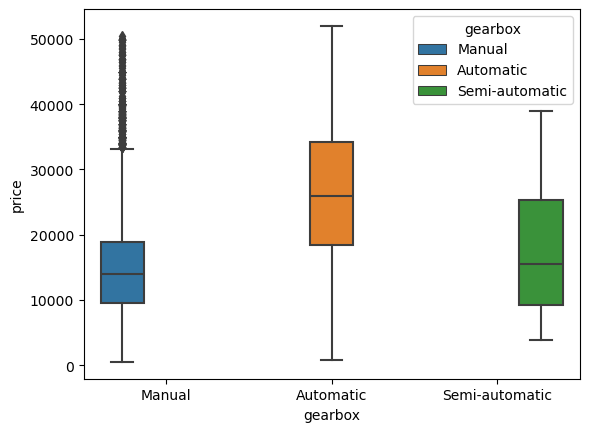

In [326]:
sns.boxplot(data = df, x = "gearbox", y = "price", hue='gearbox'); #bu bize gearbox in price i etkiledigini gösterir.

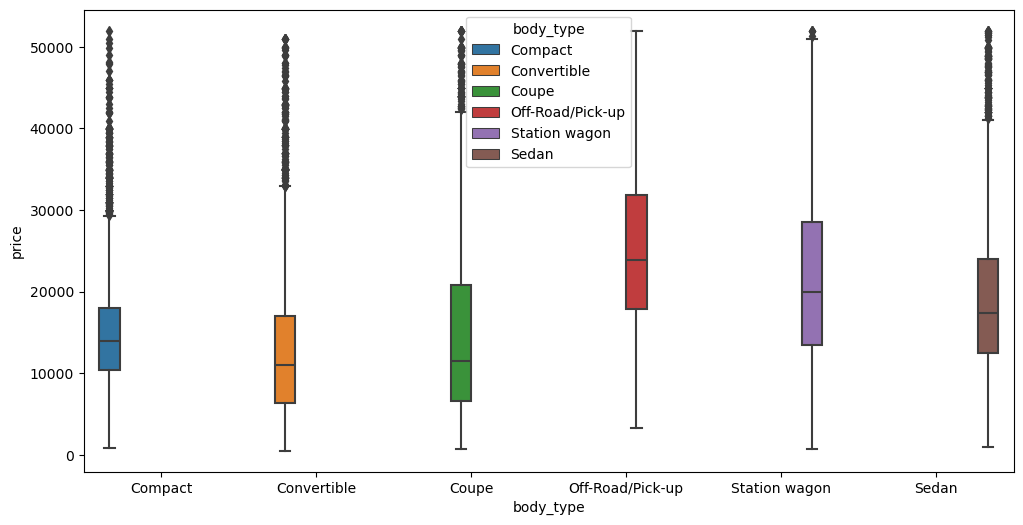

In [327]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "body_type", y = "price", hue='body_type');

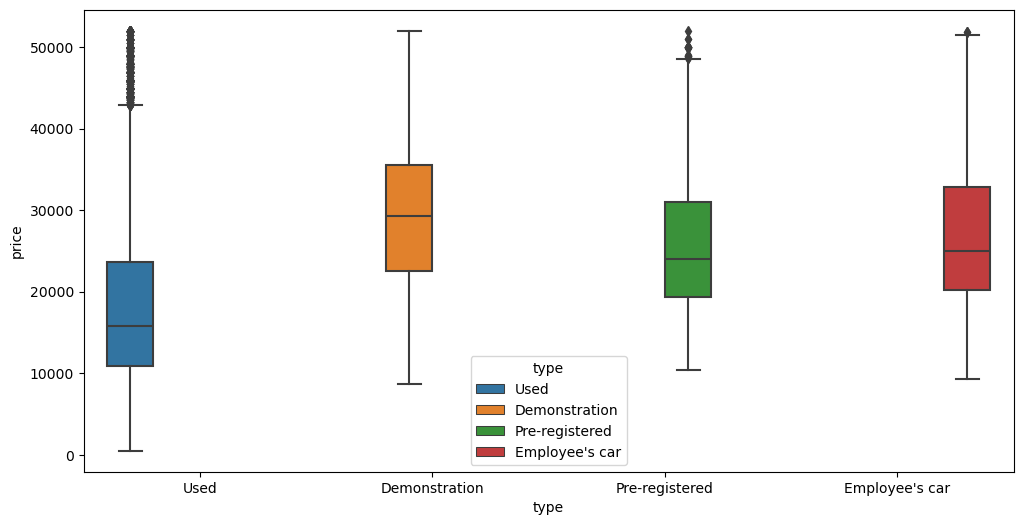

In [328]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "type", y = "price", hue='type');

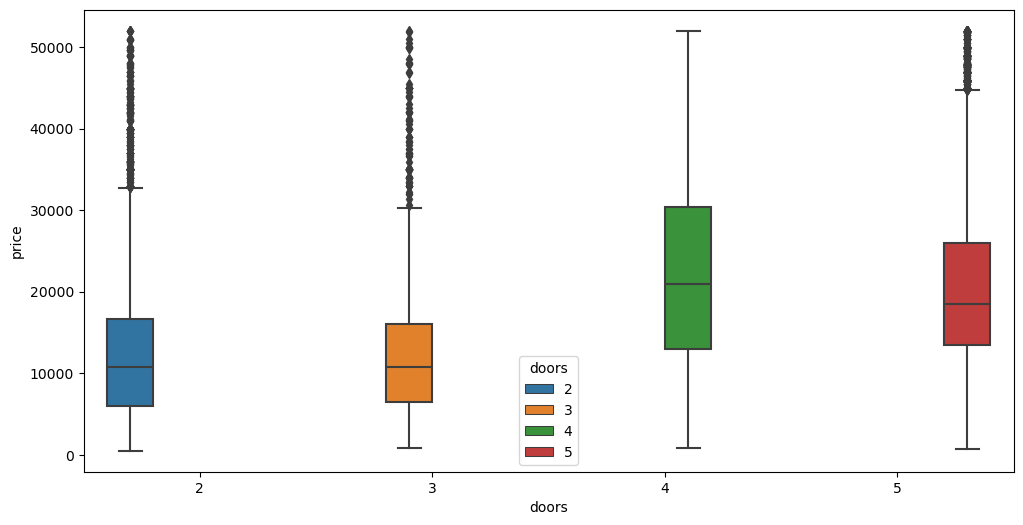

In [329]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "doors", y = "price", hue='doors');

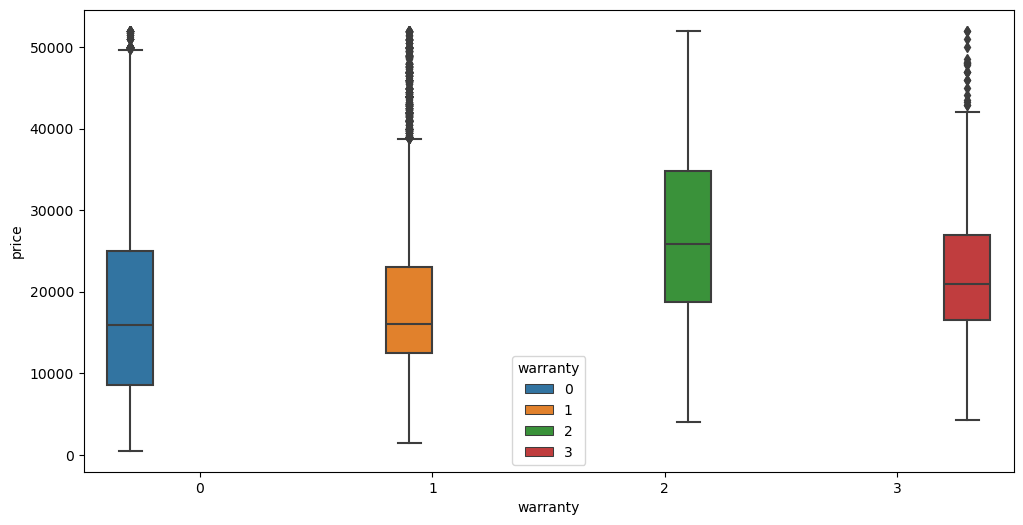

In [330]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "warranty", y = "price", hue='warranty');

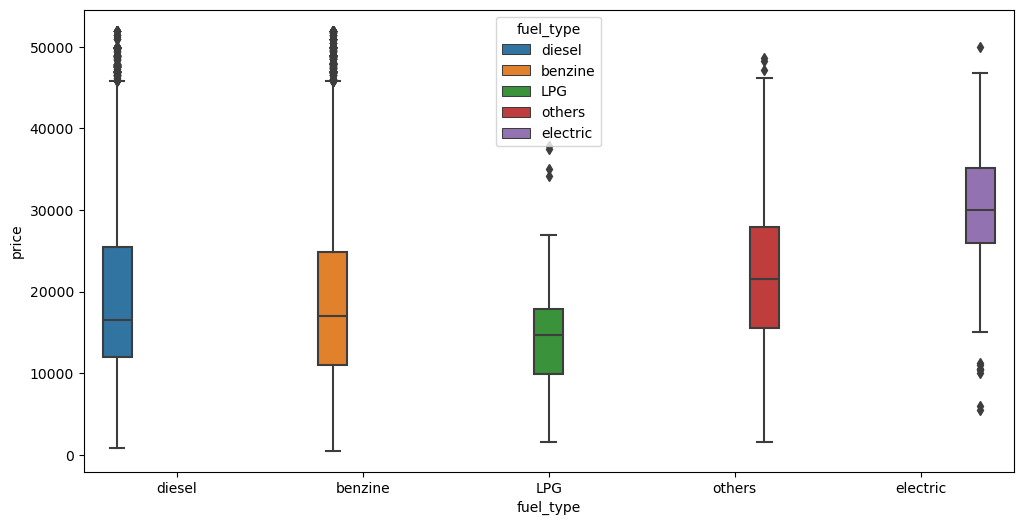

In [331]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "fuel_type", y = "price", hue='fuel_type');

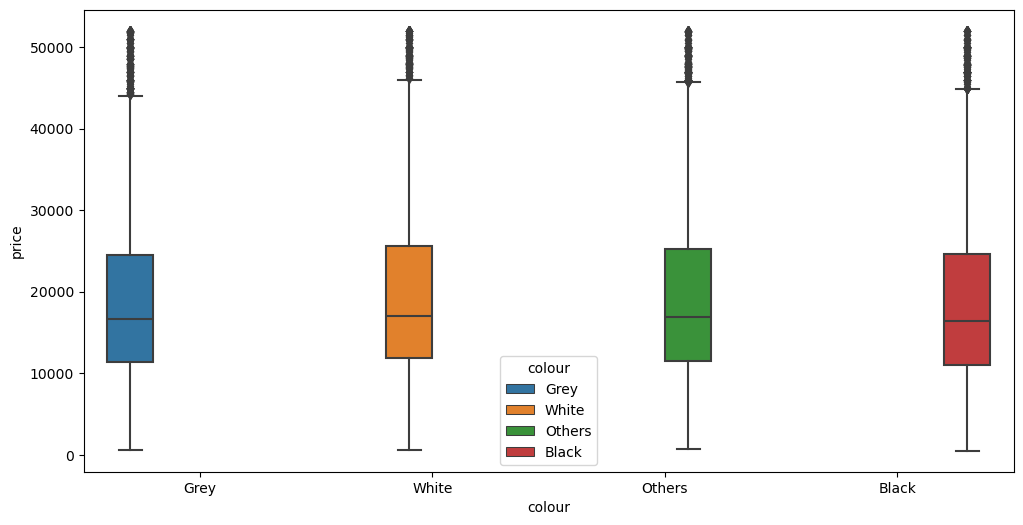

In [332]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "colour", y = "price", hue='colour');

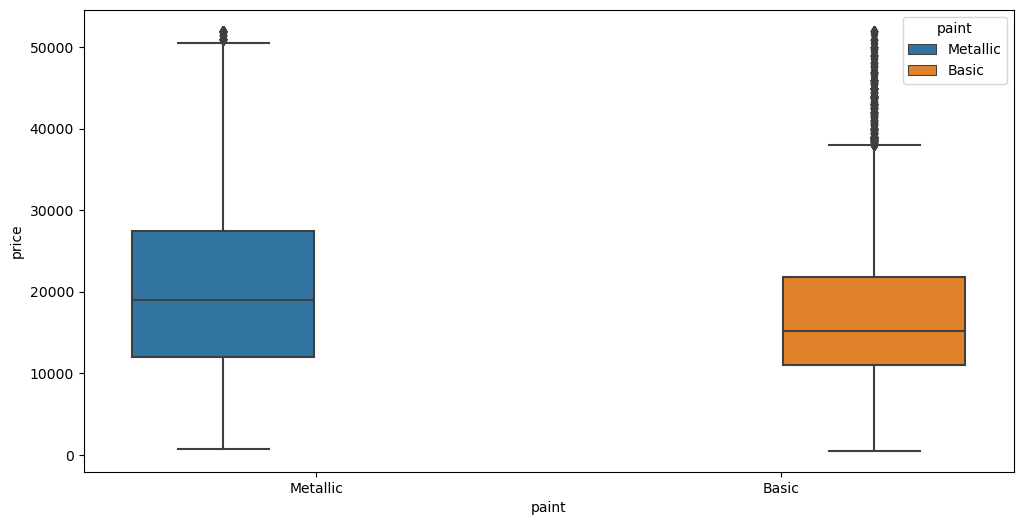

In [333]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "paint", y = "price", hue='paint');

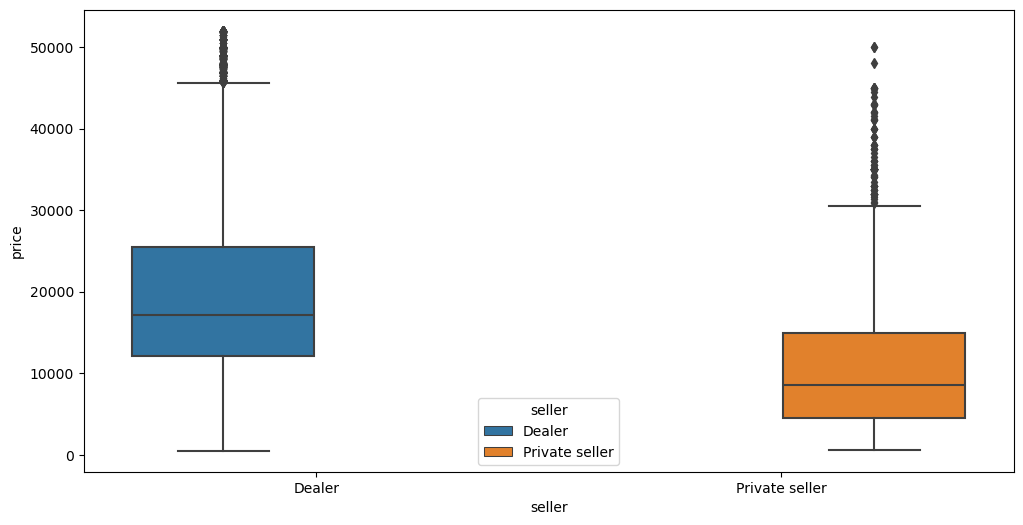

In [334]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "seller", y = "price", hue='seller');

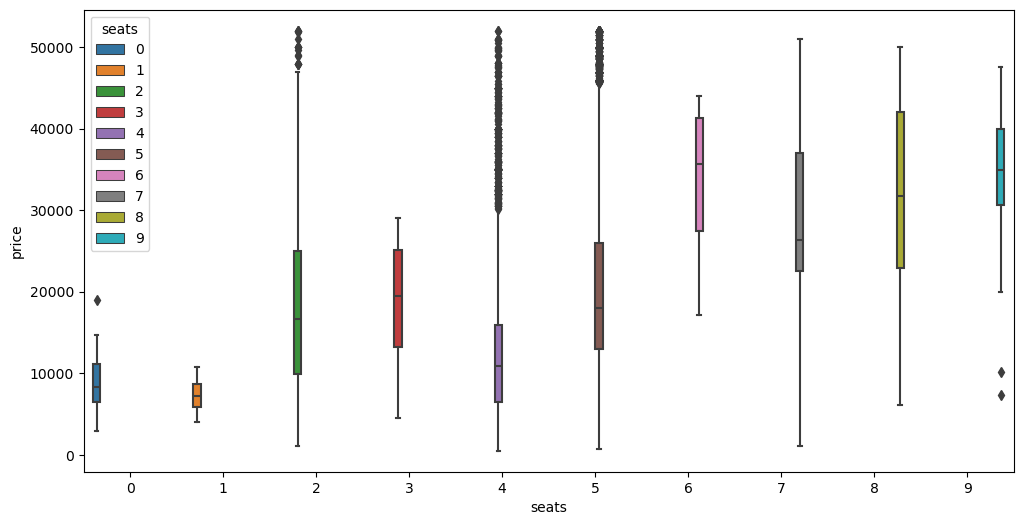

In [335]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "seats", y = "price", hue='seats');

## Seats

In [336]:
df.loc[df['seats']==0]

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
4866,Renault Twingo,Renault,"Alte Plauener Str. 2, 08541 Neuensalz bei Pla...",7750,Compact,Used,5,0,53335.0,Manual,...,6,Cloth,1,0,DE,7.0,1,2,2,1
11962,SEAT Ibiza,SEAT,"Neue Straße 53, 38444 Wolfsburg Heiligendorf, DE",9900,Compact,Used,5,0,132390.0,Manual,...,6,Cloth,1,0,DE,7.0,2,2,1,1
12073,SEAT Ibiza,SEAT,"Neue Straße 53, 38444 Wolfsburg Heiligendorf, DE",14700,Compact,Used,5,0,66510.0,Manual,...,6,Cloth,0,0,DE,4.0,1,2,1,1
13472,SEAT Toledo,SEAT,"Neue Straße 53, 38444 Wolfsburg Heiligendorf, DE",7650,Sedan,Used,5,0,124800.0,Manual,...,6,Cloth,1,0,DE,8.0,1,2,2,1
13520,SEAT Ibiza,SEAT,"Berliner Eck, 23758 Oldenburg/Holstein, DE",18950,Sedan,Used,4,1,11400.0,Manual,...,5,Cloth,1,0,DE,2.0,2,2,2,2
14979,Skoda Fabia,Skoda,"Neue Straße 53, 38444 Wolfsburg Heiligendorf, DE",2900,Sedan,Used,5,0,197000.0,Manual,...,6,Cloth,1,0,DE,13.0,1,1,1,1
15105,Skoda Fabia,Skoda,"Neue Straße 53, 38444 Wolfsburg Heiligendorf, DE",2950,Sedan,Used,5,0,139877.0,Manual,...,6,Cloth,1,0,DE,14.0,1,1,1,1
24303,Hyundai i30,Hyundai,"Neue Straße 53, 38444 Wolfsburg Heiligendorf, DE",8900,Station wagon,Used,5,0,114730.0,Manual,...,6,Cloth,0,0,DE,8.0,1,2,2,1


In [337]:
df.loc[[4866,11962, 12073, 13520, 14979,15105], 'seats']=4

In [338]:
df.loc[[13472, 24303], 'seats']=5

In [339]:
df.loc[df['seats']==9]

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
497,Mercedes-Benz C 250,Mercedes-Benz,"Von Guericke Str. 4, 38350 Helmstedt, DE",34970,Convertible,Used,2,0,85002.0,Automatic,...,6,Leather,1,0,DE,5.0,2,3,2,2
4004,Opel Vivaro,Opel,"Am Flughafen 1/3/5, 12529 Schönefeld, DE",29880,Station wagon,Used,4,0,31903.0,Manual,...,6,Other,1,0,DE,6.0,2,2,2,1
4023,Opel Vivaro,Opel,"Wölsauer Str. 6, 95615 Marktredwitz, DE",27870,Station wagon,Used,4,0,70994.0,Manual,...,6,Cloth,1,0,DE,6.0,1,2,1,1
4063,Opel Vivaro,Opel,"Siegfried-Marcus-Straße 1, 17192 Waren, DE",47500,Station wagon,Used,4,1,18877.0,Manual,...,6,Cloth,1,0,DE,4.0,2,2,1,2
4181,Opel Vivaro,Opel,"Moselstraße 11, 41464 Neuss, DE",44740,Station wagon,Used,5,0,150.0,Manual,...,5,Cloth,1,0,DE,0.0,1,1,2,1
4355,Opel Vivaro,Opel,"Torfbruchstraße 329a, 40625 Düsseldorf-Gerres...",32990,Station wagon,Demonstration,4,0,46700.0,Manual,...,6,Cloth,1,0,DE,1.0,2,2,2,1
6362,Renault Trafic,Renault,"Benzstraße 2 + 23, 93053 Regensburg, DE",30900,Station wagon,Used,4,0,42400.0,Manual,...,6,Cloth,1,0,DE,2.0,1,2,1,2
6393,Renault Trafic,Renault,"Lindenstraße 54, 15517 Fürstenwalde/Spree, DE",33890,Station wagon,Used,4,0,27301.0,Manual,...,6,Cloth,1,0,DE,2.0,1,2,2,1
6400,Renault Trafic,Renault,"Benzstraße 2 + 23, 93053 Regensburg, DE",30900,Station wagon,Used,4,0,46200.0,Manual,...,6,Cloth,1,0,DE,2.0,1,1,2,2
6418,Renault Trafic,Renault,"Seeburger Str. 68, 13581 Berlin, DE",34890,Station wagon,Used,4,0,18086.0,Manual,...,6,Cloth,1,0,DE,2.0,1,2,2,1


In [340]:
df.loc[df['seats']==1]

,make_model,make,location,price,body_type,type,doors,warranty,mileage,gearbox,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
5173,Renault,Renault,"Via dell'Artigianato, 14/16, 35020 Albignaseg...",6500,Compact,Used,2,0,21400.0,Automatic,...,6,Other,1,0,IT,4.0,1,1,1,1
5816,Renault Twizy,Renault,"22081 Hamburg, DE",3999,Coupe,Used,2,0,91900.0,Automatic,...,6,Cloth,1,0,DE,7.0,1,1,1,1
6205,Renault Twizy,Renault,"De Hoogt 12b, 5175 AX LOON OP ZAND, NL",7950,Off-Road/Pick-up,Used,2,1,35784.0,Automatic,...,6,Cloth,1,0,NL,6.0,1,2,2,1
7559,Peugeot 308,Peugeot,"17 rue de l'église, 57790 Koenigsmacker, FR",10750,Convertible,Used,2,1,82000.0,Manual,...,6,Leather,1,0,FR,12.0,2,2,2,1


In [341]:
df.loc[[5816, 6205,5173], 'seats']=2

In [342]:
df.loc[[7559], 'seats']=5

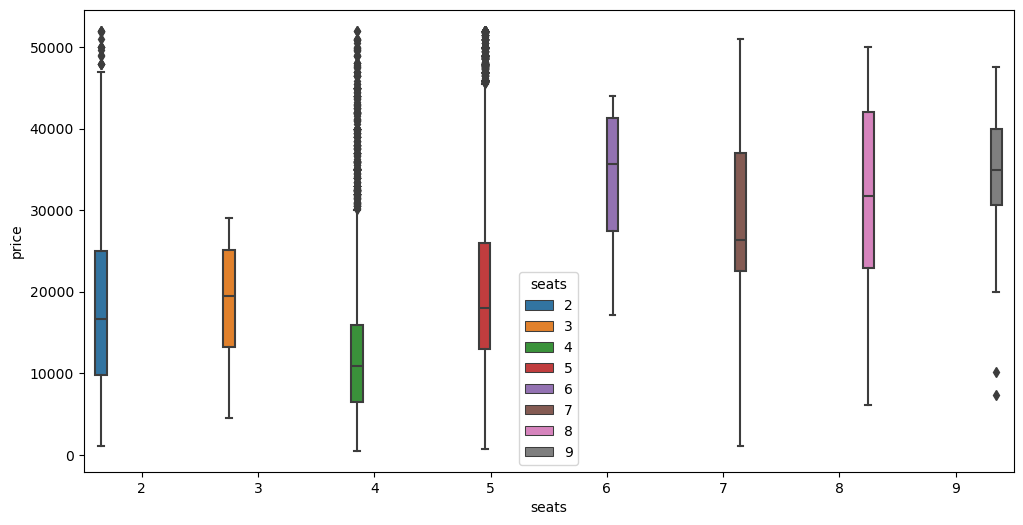

In [343]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "seats", y = "price", hue='seats');

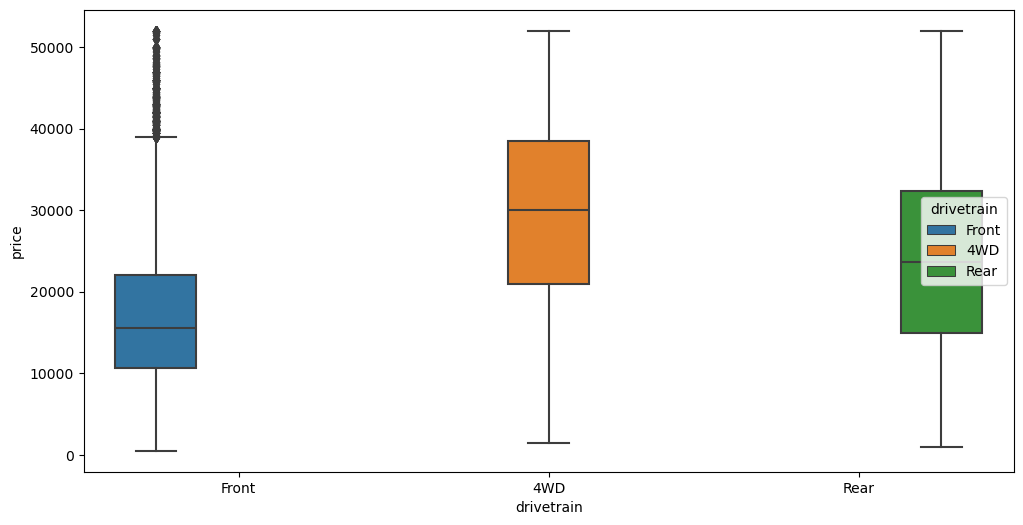

In [344]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "drivetrain", y = "price", hue='drivetrain');

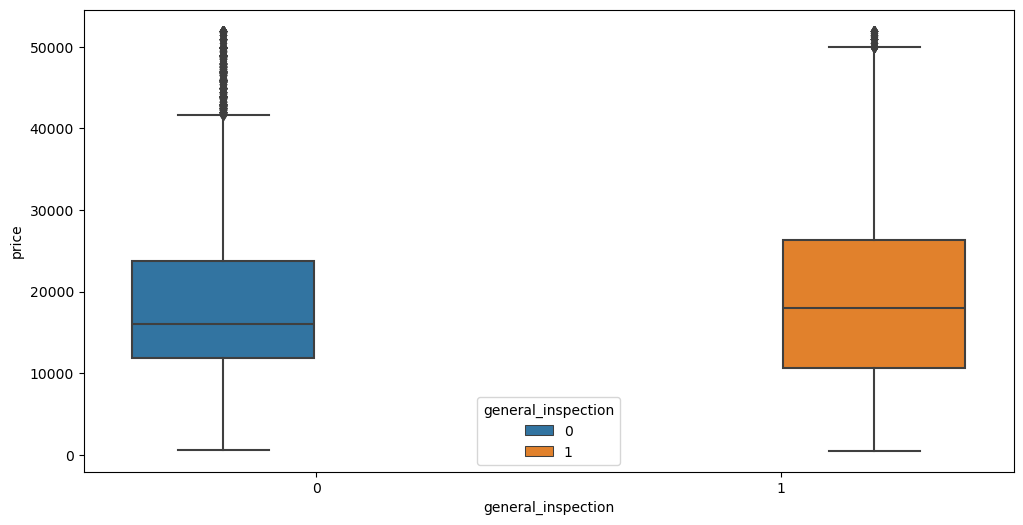

In [345]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "general_inspection", y = "price", hue='general_inspection');

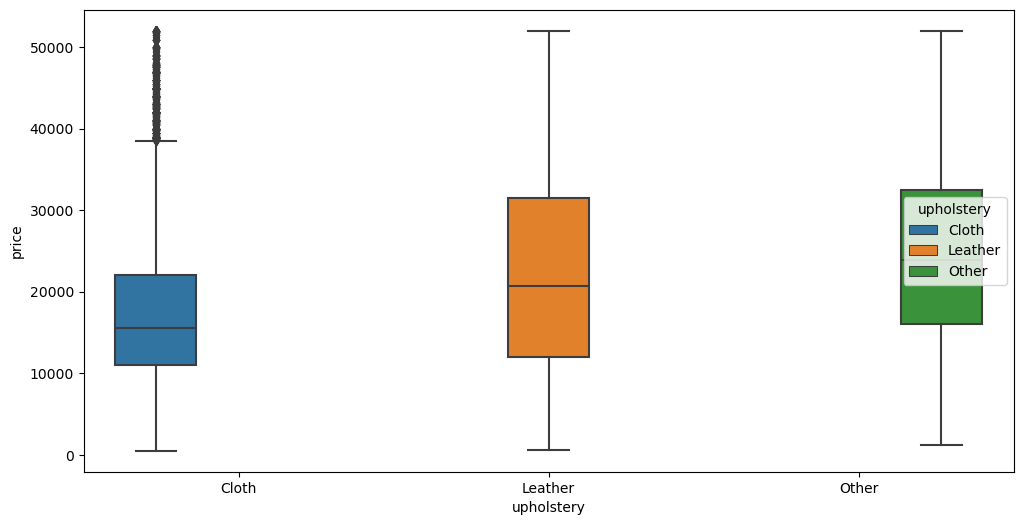

In [346]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "upholstery", y = "price", hue='upholstery');

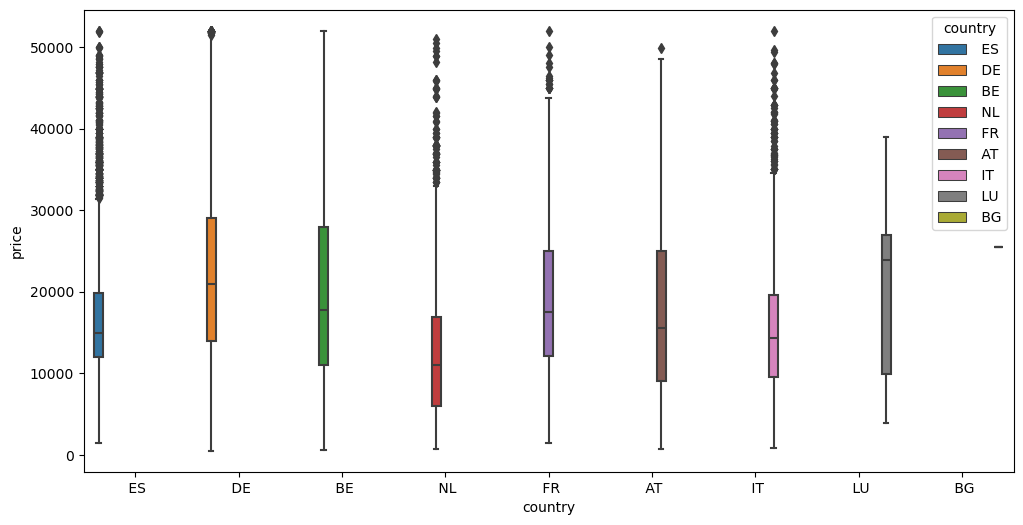

In [347]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "country", y = "price", hue='country');

In [348]:
df['make'].value_counts(dropna=False)

make
Volvo            2953
Peugeot          2136
Opel             2051
Renault          1983
Fiat             1890
Hyundai          1644
SEAT             1571
Toyota           1552
Ford             1478
Nissan           1398
Dacia            1358
Skoda            1348
Mercedes-Benz    1226
Name: count, dtype: int64

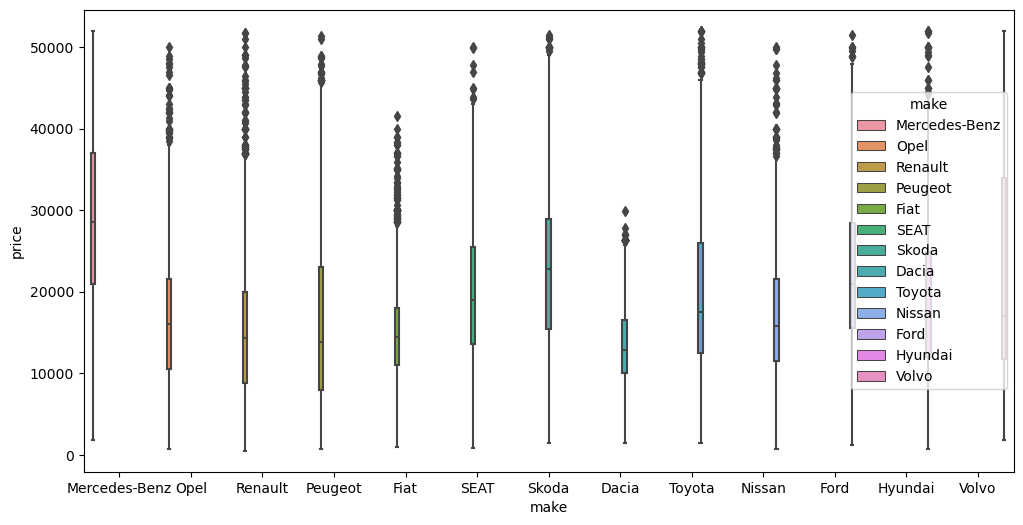

In [349]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "make", y = "price", hue='make');

## Dropping unnecessary columns

In [350]:
df.drop(['colour', 'safety_security','safety_security_n','entertainment_media_n', 'entertainment_media', 'extras', 'extras_n', 'general_inspection', 'emission_class', 'country', 'comfort_convenience_n' ], axis=1, inplace=True)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22588 entries, 0 to 28629
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            22588 non-null  object 
 1   make                  22588 non-null  object 
 2   location              22588 non-null  object 
 3   price                 22588 non-null  int64  
 4   body_type             22588 non-null  object 
 5   type                  22588 non-null  object 
 6   doors                 22588 non-null  int64  
 7   warranty              22588 non-null  int64  
 8   mileage               22588 non-null  float64
 9   gearbox               22588 non-null  object 
 10  fuel_type             22588 non-null  object 
 11  paint                 22588 non-null  object 
 12  seller                22588 non-null  object 
 13  seats                 22588 non-null  int64  
 14  power                 22588 non-null  int64  
 15  engine_size           22

## Saving the data as a csv file

In [352]:
df.to_csv("df_cleaned_no_missing_val_no_outliers.csv", index=False)

## Reading from the csv file and checking the file

In [353]:
df=pd.read_csv('df_cleaned_no_missing_val_no_outliers.csv')
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG,Mercedes-Benz C 160,Mercedes-Benz CLA 180
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES","Beethovenstr. 89, 42655 Solingen, DE","CR PATERNA-LA CAÑADA, KM. 2, 46980 PATERNA, ES"
price,16950,46990,16800,4690,22550
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Used,Used,Used,Used
doors,5,5,5,3,5
warranty,2,1,1,0,1
mileage,120200.0,18995.0,197000.0,165000.0,83339.0
gearbox,Manual,Automatic,Automatic,Manual,Manual


## Getting Dummy Variables with Pandas

In [354]:
df_dummy = pd.get_dummies(data = df, drop_first=True).astype(int)
df_dummy.T

,0,1,2,3,4,5,6,7,8,9,...,22578,22579,22580,22581,22582,22583,22584,22585,22586,22587
price,16950,46990,16800,4690,22550,26900,23900,14200,37999,23999,...,33500,38000,27190,27190,13000,4999,37600,5499,7300,4440
doors,5,5,5,3,5,5,5,5,5,5,...,4,4,4,4,5,4,4,4,3,4
warranty,2,1,1,0,1,2,1,1,1,1,...,1,0,1,1,0,1,1,0,2,0
mileage,120200,18995,197000,165000,83339,48900,21854,99016,90000,25914,...,53000,44873,93757,93757,114000,166512,40345,145000,96000,230047
seats,5,5,5,4,5,5,5,5,5,5,...,5,5,5,5,5,5,4,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drivetrain_Rear,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
comfort_convenience_Low,1,1,1,0,0,1,1,1,1,1,...,0,0,1,1,0,1,1,1,1,0
comfort_convenience_Medium,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
upholstery_Leather,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


## Saving the dummified data as csv

In [355]:
df_dummy.to_csv("df_cleaned_no_missing_val_no_outliers_dummy.csv", index=False)

## The data is ready for ML modelling